# Importing Libraries

In [233]:
import matplotlib.pyplot as plt
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
balldf = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
balldf.head(20)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,335982,1,9,2,BB McCullum,RT Ponting,SB Joshi,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
16,335982,1,9,3,RT Ponting,BB McCullum,SB Joshi,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
17,335982,1,9,4,BB McCullum,RT Ponting,SB Joshi,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
18,335982,1,9,5,BB McCullum,RT Ponting,SB Joshi,6,0,6,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# Model 1 - Batting Score Prediction
## 1. Feature Selection and Engineering 

In [199]:
# Group details on batsmen
batgroup = balldf.groupby(['batsman'])

batdf = balldf.groupby(['batsman']).agg({'ball':'count','id':'nunique','batsman_runs':'sum'})\
                                .rename(columns={'ball':'balls_faced','id':'innings','batsman_runs':'runs'})
    
# Create a batting dataframe with a summary statistics for each batsman

batdf['4s'] = balldf[balldf['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()
batdf['6s'] = balldf[balldf['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
batdf.fillna(0,inplace=True)


# Batting average = total rus scored/no. of times batsman is been dismissed
batdf['AVG'] = round(batdf['runs']/balldf.groupby('batsman')['dismissal_kind'].count(),2)

# Strike Rate = (Runs Scored / Balls faced) * 100
batdf['SR'] = round(batdf['runs']/batdf['balls_faced']*100,2)


In [200]:
batdf['match_runs'] = balldf.groupby('id').tail(7).groupby('batsman').sum()['batsman_runs'] / 7
batdf['match_runs'].fillna(0,inplace=True)

In [201]:
# Calculaitng 100s
tempdf = balldf.groupby(['batsman', "id"]).sum()['batsman_runs'].reset_index()
batdf['100s'] = tempdf[tempdf['batsman_runs'] > 100].groupby('batsman')['batsman_runs'].count()
batdf['100s'].fillna(0,inplace=True)

#Calculating 50s
batdf['50s'] = tempdf[tempdf['batsman_runs'] > 50].groupby('batsman')['batsman_runs'].count()
batdf['50s'].fillna(0,inplace=True)

t_mean=batdf['innings'].mean()

print(f'Average Number of Innings Played : {t_mean} Matches')
batdf = batdf[batdf['innings'] > t_mean]
batdf.sample(5)

Average Number of Innings Played : 22.64804469273743 Matches


,balls_faced,innings,runs,4s,6s,AVG,SR,match_runs,100s,50s
batsman,,,,,,,,,,
JC Buttler,1184,57,1714,167.0,77.0,35.71,144.76,10.142857,0.0,11.0
SV Samson,1970,102,2584,191.0,115.0,28.40,131.17,10.285714,2.0,14.0
Harbhajan Singh,632,86,829,79.0,42.0,14.80,131.17,6.285714,0.0,1.0
UT Yadav,135,34,122,11.0,4.0,8.71,90.37,1.571429,0.0,0.0
AB de Villiers,3264,156,4849,390.0,235.0,42.54,148.56,19.714286,3.0,38.0


# Model Deployment

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn. linear_model import Ridge
from sklearn. linear_model import Lasso



X = batdf.drop('match_runs',axis=1)
y = batdf['match_runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 74)

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
model = [lr,ridge,lasso]
model_name = ["Linear Regression",'Ridge','Lasso']
model_y = [[]] *len(model)

for idx, i in enumerate(model):
    i.fit(X_train, y_train)
    model_y[idx] = i.predict(X_test)
    print(model_name[idx],': Completed')


Linear Regression : Completed
Ridge : Completed
Lasso : Completed


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.012e+01, tolerance: 3.179e-01
  model = cd_fast.enet_coordinate_descent(


# Finding the Right Model

In [219]:
for idx, i in enumerate(model):
    print(model_name[idx],':')
    print('-'*40)
    
    # Fetching intercept and coefficient
    print("Intercept:", i.intercept_)
    print("Coefficients:",i.coef_)

    print('\n\nr2 score is: ', r2_score(y_test, model_y[idx]))
    print('mean_sqrd_error is: ', mean_squared_error(y_test,model_y[idx]))
    print('root_mean_squared error of is: ', np.sqrt(mean_squared_error(y_test,model_y[idx])))
    print('-'*40,'\n\n\n\n')

Linear Regression :
----------------------------------------
Intercept: 2.9472621159491874
Coefficients: [-0.00743631 -0.01184704  0.01716523 -0.04708257 -0.03008667  0.08183094
 -0.03137892 -0.20443593 -0.27752695]


r2 score is:  0.4374651192716107
mean_sqrd_error is:  9.813248858045915
root_mean_squared error of is:  3.132610550011909
---------------------------------------- 




Ridge :
----------------------------------------
Intercept: 2.9279379220070423
Coefficients: [-0.0074244  -0.01152461  0.01714112 -0.04711771 -0.03013669  0.08200007
 -0.03127172 -0.19843075 -0.27653472]


r2 score is:  0.43737798826045504
mean_sqrd_error is:  9.814768831873344
root_mean_squared error of is:  3.132853145596414
---------------------------------------- 




Lasso :
----------------------------------------
Intercept: -0.0020202253476755416
Coefficients: [-0.00303926  0.01994689  0.0106461  -0.04913514 -0.0195756   0.04009163
  0.         -0.         -0.00461672]


r2 score is:  0.4087243263153

# Grid Searh CV (Hyperparameter Tuning)

In [204]:
from sklearn. model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha": np. arange (0.0001, 1, 10),
"solver": ["sag", "lsqr"]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.8249956053925344


In [205]:
pred = ridge_cv.predict(X.loc[['V Kohli']])
print('Runs prediction: ', pred[0])

Runs prediction:  25.119820155945845


In [206]:
def predict_batsman(batsmen): 
    batsman_score={}
    for i in batsmen:
        
        #Prediction per player
        batsman_score[i] = round(float(ridge_cv.predict(X.loc[[i]])),2)
        
    print(batsman_score)
    
#     scores = list(batsman_score.values())
#     scores = list(map(lambda x: x[0], scores))

    fig = plt.figure(figsize = (10, 5))
    plt.bar(batsman_score.keys(), batsman_score.values(),
        width = 0.4)
    plt.xlabel("Player Names")
    plt.ylabel("Predicted scores")
    plt.title("Batsman runs prediction")
    plt.show()

{'AB de Villiers': 22.91, 'KL Rahul': 11.37, 'RG Sharma': 21.54, 'F du Plessis': 10.25, 'V Kohli': 25.12}


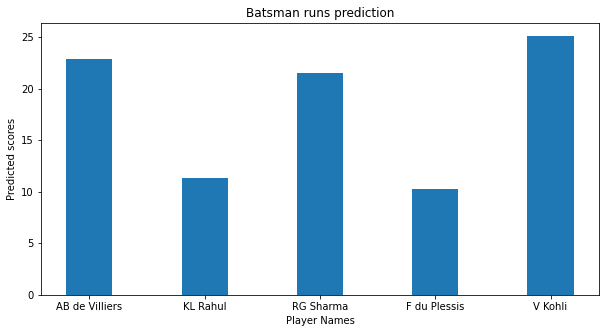

In [207]:
predict_batsman(['AB de Villiers','KL Rahul','RG Sharma','F du Plessis','V Kohli'])


# Model 2 - Bowler Economy Predictions
## Feature Engineering

In [208]:
balldf['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [209]:

bowldf = balldf.groupby(['bowler']).agg({'ball':'count','batsman_runs':'sum'})\
                                                                .rename(columns={'ball':'balls_bowled','batsman_runs':'runs_conceded'})
bwl_wkts = balldf[balldf['dismissal_kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowldf['wickets'] = bwl_wkts.groupby(['bowler'])['ball'].count()

In [210]:
# Calculate the total no. of overs bowled
bowldf['overs'] = round(bowldf.balls_bowled/6 ,1) 

bowldf.fillna(0,inplace=True)



In [211]:
# Add the runs conceded through wide and noball
bowldf['runs_conceded'] = bowldf['runs_conceded'].add(balldf[balldf['extras_type'].isin(['wides','noballs'])].groupby('bowler')['extra_runs'].sum(),fill_value=0)

# Bowler econ rate
bowldf['bowl_econ'] = round(bowldf['runs_conceded']/bowldf['overs'],2)
bowldf.head(n=5)

,balls_bowled,runs_conceded,wickets,overs,bowl_econ
bowler,,,,,
A Ashish Reddy,270,396.0,18.0,45.0,8.80
A Chandila,234,242.0,11.0,39.0,6.21
A Choudhary,108,144.0,5.0,18.0,8.00
A Dananjaya,25,47.0,0.0,4.2,11.19
A Flintoff,66,105.0,2.0,11.0,9.55


In [212]:
# total overs in last 5 matches
overs = pd.DataFrame(balldf.groupby(['bowler','id'])['over'].nunique())
overs = overs.groupby(['bowler'])['over'].tail(5)
print(overs)

# total runs in last 5 matches
bowlermatch = pd.DataFrame(balldf.groupby(['bowler','id'])['total_runs'].sum())
bowlermatch = bowlermatch.groupby('bowler')['total_runs'].tail(5)
print(bowlermatch)

result = pd.concat([bowlermatch, overs], axis=1, join='inner')
print(result)

result['bowl_econ'] = round(result['total_runs'] / result['over'], 2)
bowldf['recent_economy'] = result.groupby('bowler')['bowl_econ'].mean()

bowler          id     
A Ashish Reddy  829727     1
                829731     2
                829773     2
                980907     2
                980915     2
                          ..
Z Khan          1082622    2
                1082635    4
                1082640    4
                1082642    4
                1082646    4
Name: over, Length: 1741, dtype: int64
bowler          id     
A Ashish Reddy  829727      5
                829731     16
                829773     19
                980907     26
                980915     14
                           ..
Z Khan          1082622     9
                1082635    30
                1082640    35
                1082642    25
                1082646    32
Name: total_runs, Length: 1741, dtype: int64
                        total_runs  over
bowler         id                       
A Ashish Reddy 829727            5     1
               829731           16     2
               829773           19     2
              

In [213]:
print(bowldf['overs'].mean())
bowldf = bowldf[bowldf['overs'] > bowldf['overs'].mean()]

76.77380952380955


# Model Deployment

In [221]:
X = bowldf.drop('recent_economy',axis=1)
y = bowldf['recent_economy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 74)

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
model = [lr,ridge,lasso]
model_name = ["Linear Regression",'Ridge','Lasso']
model_y = [[]] *len(model)

for idx, i in enumerate(model):
    i.fit(X_train, y_train)
    model_y[idx] = i.predict(X_test)
    print(model_name[idx],': Completed')

Linear Regression : Completed
Ridge : Completed
Lasso : Completed


In [222]:
for idx, i in enumerate(model):
    print(model_name[idx],':')
    print('-'*40)
    
    # Fetching intercept and coefficient
    print("Intercept:", i.intercept_)
    print("Coefficients:",i.coef_)

    print('\n\nr2 score is: ', r2_score(y_test, model_y[idx]))
    print('mean_sqrd_error is: ', mean_squared_error(y_test,model_y[idx]))
    print('root_mean_squared error of is: ', np.sqrt(mean_squared_error(y_test,model_y[idx])))
    print('-'*40,'\n\n\n\n')

Linear Regression :
----------------------------------------
Intercept: 3.398259332626262
Coefficients: [-8.00594694e-01  3.29561440e-03 -3.85318149e-02  4.78921648e+00
  7.43350642e-01]


r2 score is:  0.08835085823255018
mean_sqrd_error is:  2.141631300429688
root_mean_squared error of is:  1.4634313446245737
---------------------------------------- 




Ridge :
----------------------------------------
Intercept: 3.337407838245328
Coefficients: [-0.04872732  0.00335284 -0.03901485  0.27764606  0.75167409]


r2 score is:  0.06050104149493585
mean_sqrd_error is:  2.20705563584986
root_mean_squared error of is:  1.4856162478412316
---------------------------------------- 




Lasso :
----------------------------------------
Intercept: 9.038576864022746
Coefficients: [-0.00598591  0.00583351 -0.02955886 -0.          0.        ]


r2 score is:  -0.019538575491504506
mean_sqrd_error is:  2.3950833991187803
root_mean_squared error of is:  1.5476056988518685
---------------------------------

In [226]:
pred = lr.predict(X.loc[['YS Chahal']])
print('Runs prediction: ', pred)

Runs prediction:  [8.18875657]


In [231]:
def predict_bowler(bowlers): 
    #Dictionary to maintain bowler and his predicted economy
    bowler_score={}
    
    # Loop through list of Bowler
    for i in bowlers:
        #Prediction per player
        bowler_score[i]= round(float(lr.predict(X.loc[[i]])),2)


    print(bowler_score)

 
    fig = plt.figure(figsize = (12, 5))
    plt.bar(bowlers, bowler_score.values(),
        width = 0.4)
    plt.xlabel("Bowler Names")
    plt.ylabel("Predicted economy")
    plt.title("Bowler economy prediction")
    plt.show()

{'Rashid Khan': 6.45, 'JJ Bumrah': 7.74, 'YS Chahal': 8.19, 'AD Russell': 10.45, 'B Kumar': 7.22}


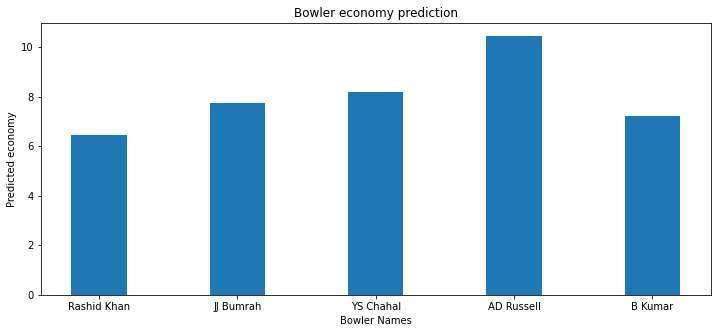

In [232]:
predict_bowler([ 'Rashid Khan', 'JJ Bumrah','YS Chahal', 'AD Russell', 'B Kumar'])